# Get started with 3D array

Import all modules:

In [17]:
from drp_template.image import save_figure2, ortho_slice, plot_histogram
import drp_template.input_output as io
from drp_template.default_params import update_parameters_file
from drp_template.math import get_connected_porosity, get_phase_fractions, label_binary
import numpy as np
from drp_template.tools import mk_paramsfile

Set the file path of your 3D array. For the example you can use a provided 2 phase binary.

In [25]:
# file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_segmented.raw'
# file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw'
# raw_file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube.raw'
file_path = 'data/pore_100_100_400.raw'
raw_file_path = 'data/raw_100cube.raw'

Each 3D.raw must be imported based on it's corresponding parameters like dimensions (nx, ny, nz) or type (uint8, uint16, uint32). The following data (uint8) is sorted in the shape of `data[nz, ny, nx]`. Due to dimensions rules (see README.md) all arrays must be in the format of `data[nx, ny, nz]`. The programm can handle the conversion on its own based on the provided order of dimensions. Regular as well as irregular data can be imported.

In [29]:
dimensions = {'nz': 400, 'ny': 100, 'nx': 100}
dimensions_raw = {'nz': 100, 'ny': 100, 'nx': 100}
data = io.import_model(file_path, dtype='uint8', dimensions=dimensions)
data_raw = io.import_model(raw_file_path, dtype='uint16', dimensions=dimensions_raw)

Parameters filename: pore_100_100_400.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 100
ny: 100
nz: 400
---------------------------------------------------------------------------
data/pore_100_100_400.raw:                                                 
Ups, the minimum value in your data is 1. Automatic adjustments are needed.
---------------------------------------------------------------------------
Parameters filename: raw_100cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 100
ny: 100
nz: 100


In case a subvolume is needed, a corresponding `paramsfile` must be prepared which is always created while importing. 

In [30]:
# Define the parameter-file
# params_file='subvolume_100_100_100.json'
params_file = 'pore_100_100_400.json'

The binaries can also be enriched with labels like pore, matrix, etc.

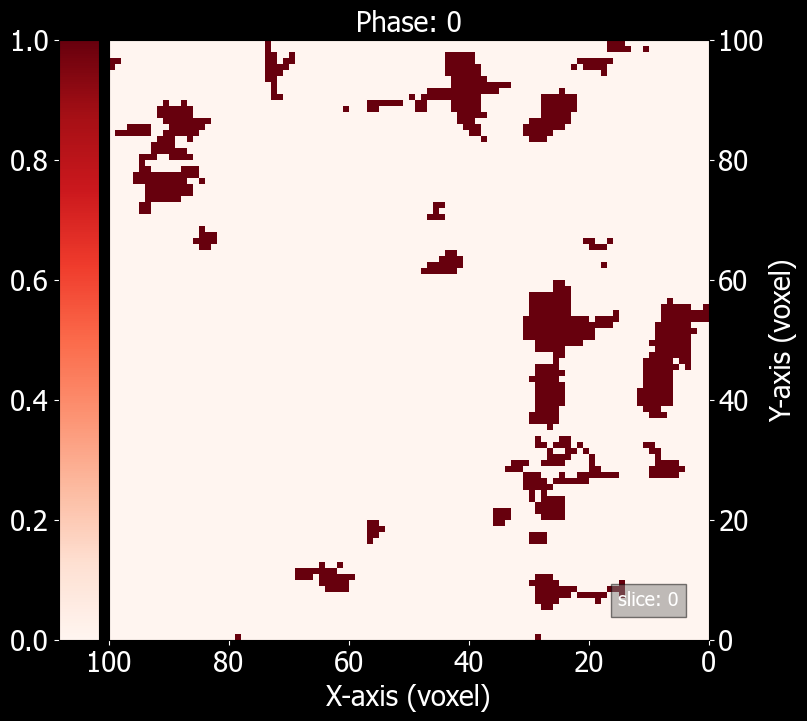

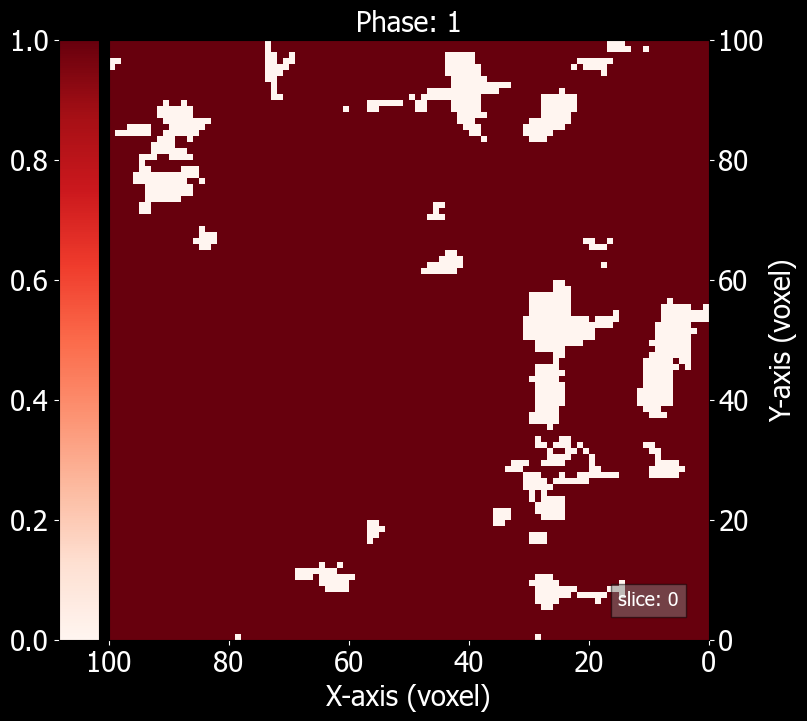

{'0': 'Pore', '1': 'Solid'}


In [31]:
# labels = {0: 'Pore', 1: 'Matrix'} # Define labels
labels = label_binary(data, paramsfile=params_file)
print(labels)

phase_fracs = get_phase_fractions(data, labels=labels, paramsfile=params_file)

The corresponding plots in xy, yz, and xz plane.

In [ ]:
# Define data for visualization
# data_viz = subvolume
data_viz = data

In [ ]:
fractions = get_phase_fractions(data=data_viz, labels=labels, paramsfile=params_file)
print(fractions)

In [ ]:
fig_xy, ax = ortho_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='xy', subvolume=None, labels=labels, title="slice XY", voxel_size=None, dark_mode=False)
# fig_xy, ax = ortho_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='xy', subvolume=None, labels=labels, title="slice XY", voxel_size=6.74, dark_mode=False)
fig_yz, ax = ortho_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='yz', subvolume=None, labels=labels, title="slice YZ", voxel_size=None, dark_mode=False)
fig_xz, ax = ortho_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='xz', subvolume=None, labels=labels, title="slice XZ", voxel_size=None, dark_mode=False)

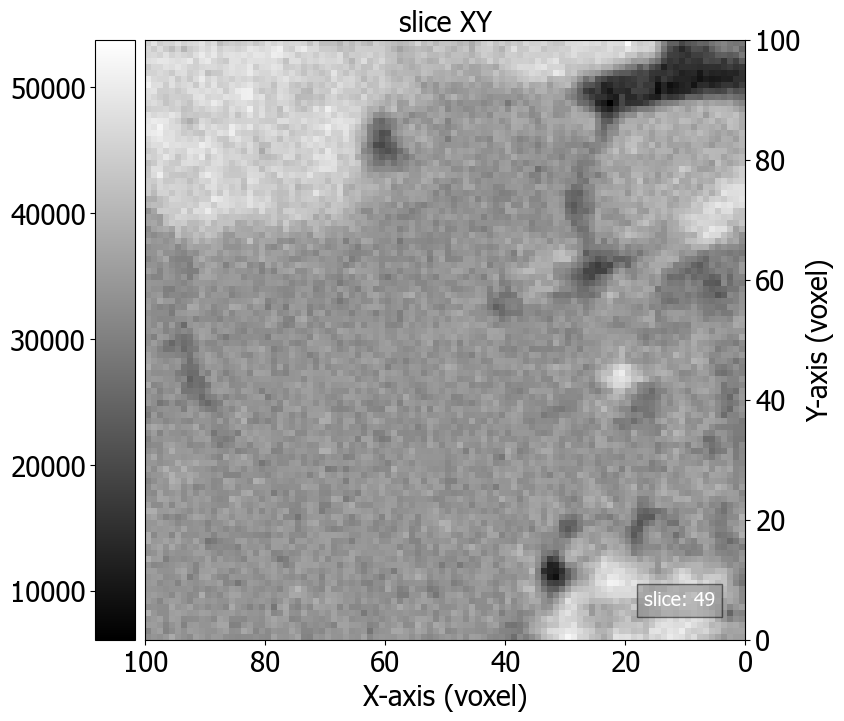

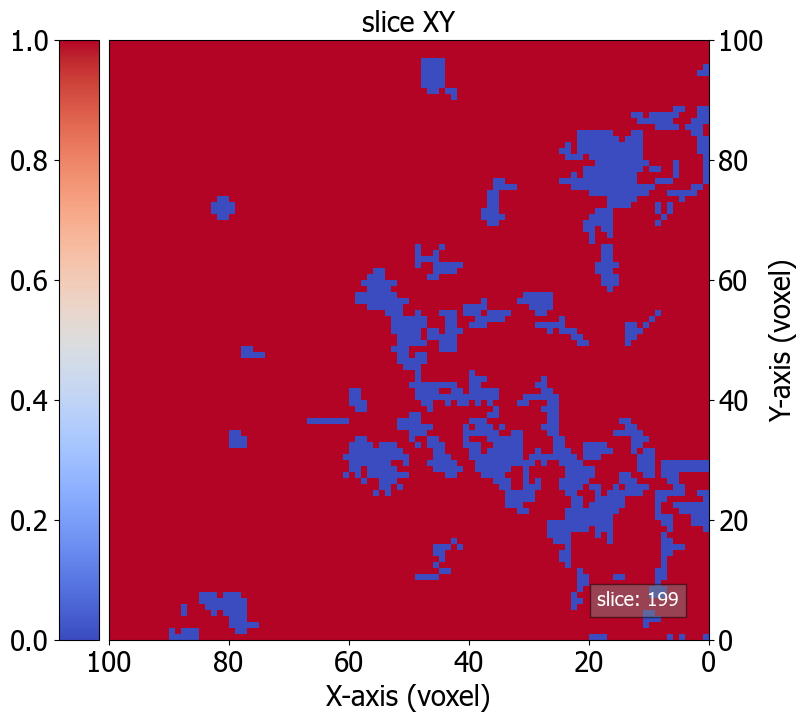

In [32]:
fig_xy, ax = ortho_slice(data_raw, paramsfile='raw_100cube.json', cmap_set="gray", slice=None, plane='xy', subvolume=None, labels=None, title="slice XY", voxel_size=None, dark_mode=False, cmap_intensity=1)
fig_xy, ax = ortho_slice(data, paramsfile='pore_100_100_400.json', cmap_set="coolwarm", slice=None, plane='xy', subvolume=None, labels=None, title="slice XY", voxel_size=None, dark_mode=False)
# fig_xy, ax = ortho_slice(data_raw, paramsfile='400Cube.json', cmap_set="twilight_shifted", slice=399, plane='xy', subvolume=None, labels=None, title="slice XY", voxel_size=None, dark_mode=False)

Finally, the figures can be saved in high quality.

In [ ]:
save_figure2(fig_xy, filename='subvolume_plane_xy')
save_figure2(fig_yz, filename='subvolume_plane_yz')
save_figure2(fig_xz, filename='subvolume_plane_xz')

Get the connected porosity

Let's plot some histograms.

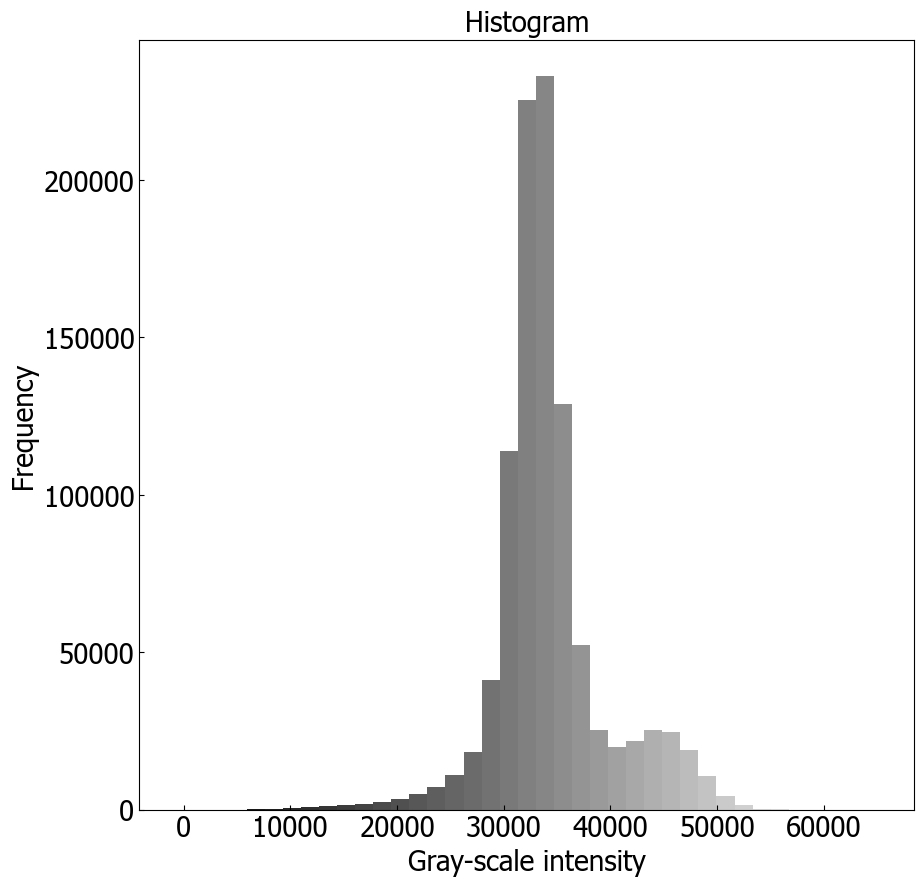

In [14]:
fig_hist = plot_histogram(data_raw, dtype='uint16',cmap_set='gray', log_scale=None, dark_mode=False)


In [ ]:
output = get_connected_porosity(data, paramsfile='subvolume_100_100_100.json')
con_pore = get_phase_fractions(output)